In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as tts

df = pd.read_csv('penguins.csv')
df = df.dropna()

Y = df['species']
X = df.drop(['species'], axis='columns')
X['species'] = Y
df = X
x_train, x_test, _, _ = tts(X,Y,test_size=0.2,shuffle = True)
# dummies = pd.get_dummies(df.island)
# dummies = pd.concat([dummies, pd.get_dummies(df.sex), pd.get_dummies(df.year)], axis='columns')
# merge = pd.concat([df,dummies], axis='columns')
# X = merge.drop(['island','sex','year',2007,'species'], axis='columns')

X

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,species
0,Torgersen,39.1,18.7,181.0,3750.0,male,2007,Adelie
1,Torgersen,39.5,17.4,186.0,3800.0,female,2007,Adelie
2,Torgersen,40.3,18.0,195.0,3250.0,female,2007,Adelie
4,Torgersen,36.7,19.3,193.0,3450.0,female,2007,Adelie
5,Torgersen,39.3,20.6,190.0,3650.0,male,2007,Adelie
...,...,...,...,...,...,...,...,...
339,Dream,55.8,19.8,207.0,4000.0,male,2009,Chinstrap
340,Dream,43.5,18.1,202.0,3400.0,female,2009,Chinstrap
341,Dream,49.6,18.2,193.0,3775.0,male,2009,Chinstrap
342,Dream,50.8,19.0,210.0,4100.0,male,2009,Chinstrap


###Purity Value, Classification

In [26]:
def check_purity(data):
    
    lbl = data[:, -1]
    unique_classes = np.unique(lbl)

    if len(unique_classes) == 1:
        return True
    else:
        return False

# classify continuous datas
def classify_data(data):
    
    label_column = data[:, -1]
    unique_classes, counts_unique_classes = np.unique(label_column, return_counts=True)

    index = counts_unique_classes.argmax()
    classification = unique_classes[index]

    return classification

classify_data(x_train[x_train.bill_length_mm > 50].values)


'Chinstrap'

###Potential Splits

In [27]:
def get_potential_splits(data):
    
    potential_splits = {}
    n_columns = data.shape[1]
    for column_index in range(n_columns - 1):          # excluding the last column which is the species
        values = data[:, column_index]
        unique_values = np.unique(values)
        
        potential_splits[column_index] = unique_values
    
    return potential_splits


potential_splits = get_potential_splits(x_train.values)
potential_splits

{0: array(['Biscoe', 'Dream', 'Torgersen'], dtype=object),
 1: array([32.1, 33.1, 33.5, 34.0, 34.5, 34.6, 35.1, 35.2, 35.3, 35.5, 35.6,
        35.7, 35.9, 36.0, 36.2, 36.3, 36.4, 36.5, 36.7, 36.8, 36.9, 37.0,
        37.2, 37.3, 37.5, 37.6, 37.8, 37.9, 38.1, 38.2, 38.3, 38.5, 38.6,
        38.7, 38.8, 38.9, 39.0, 39.1, 39.2, 39.3, 39.5, 39.6, 39.7, 40.1,
        40.2, 40.3, 40.6, 40.7, 40.8, 40.9, 41.0, 41.1, 41.3, 41.4, 41.5,
        41.6, 41.7, 41.8, 42.0, 42.1, 42.2, 42.3, 42.5, 42.6, 42.7, 42.8,
        42.9, 43.2, 43.3, 43.4, 43.5, 43.6, 43.8, 44.0, 44.1, 44.4, 44.5,
        44.9, 45.0, 45.1, 45.2, 45.3, 45.4, 45.5, 45.6, 45.7, 45.8, 46.0,
        46.1, 46.2, 46.3, 46.4, 46.5, 46.6, 46.7, 46.8, 46.9, 47.0, 47.2,
        47.3, 47.4, 47.5, 47.6, 47.7, 47.8, 48.1, 48.2, 48.4, 48.5, 48.6,
        48.7, 48.8, 49.0, 49.1, 49.2, 49.3, 49.4, 49.5, 49.6, 49.7, 49.8,
        50.0, 50.1, 50.2, 50.3, 50.4, 50.5, 50.6, 50.7, 50.8, 51.1, 51.3,
        51.4, 51.5, 51.7, 51.9, 52.0, 52.2, 52.5, 

###Graphical Analysis of all the possible best splits in the data

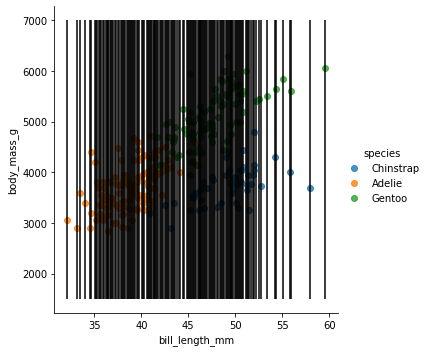

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot(data=x_train, x="bill_length_mm", y="body_mass_g", hue = "species", fit_reg=False)
# plt.hlines(y=potential_splits[5], xmin=30, xmax=60)
plt.vlines(x=potential_splits[1], ymin=1500, ymax=7000)

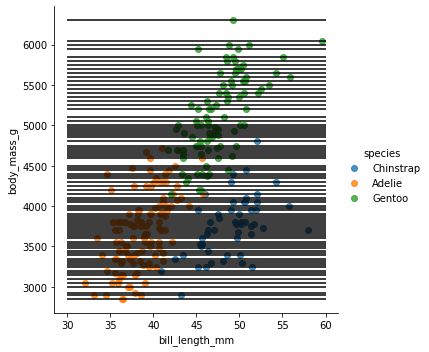

In [29]:
sns.lmplot(data=x_train, x="bill_length_mm", y="body_mass_g", hue = "species", fit_reg=False)
plt.hlines(y=potential_splits[4], xmin=30, xmax=60)
# plt.vlines(x=potential_splits[2], ymin=1500, ymax=7000)

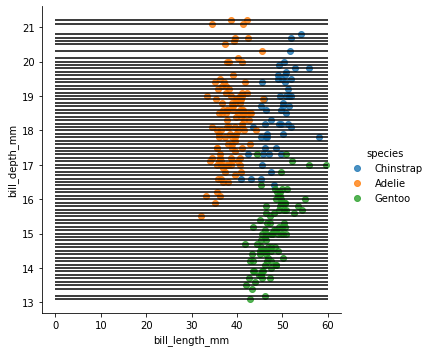

In [30]:
sns.lmplot(data=x_train, x="bill_length_mm", y="bill_depth_mm", hue = "species", fit_reg=False)
plt.hlines(y=potential_splits[2], xmin=0, xmax=60)

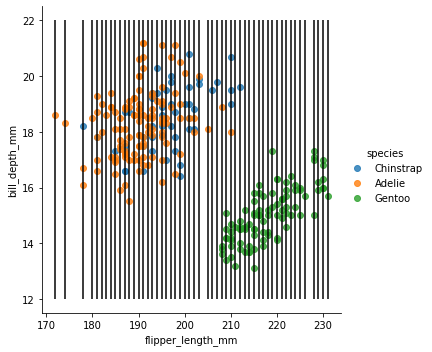

In [31]:
sns.lmplot(data=x_train, x="flipper_length_mm", y="bill_depth_mm", hue = "species", fit_reg=False)
plt.vlines(x=potential_splits[3], ymin=12, ymax=22)

###Split Data

In [32]:
def split_data(data, split_column, split_value):
    
    split_column_values = data[:, split_column]

    type_of_feature = FEATURE_TYPES[split_column]
    if type_of_feature == "continuous":
        data_below = data[split_column_values <= split_value]
        data_above = data[split_column_values >  split_value]
    
    # feature is categorical   
    else:
        data_below = data[split_column_values == split_value]
        data_above = data[split_column_values != split_value]
    
    return data_below, data_above


###Entropy and Information Gain

In [33]:
def calculate_entropy(data):
    
    label_column = data[:, -1]
    _, counts = np.unique(label_column, return_counts=True)

    probabilities = counts / counts.sum()
    entropy = sum(probabilities * -np.log2(probabilities))
     
    return entropy

def calculate_overall_entropy(data_below, data_above):
    
    n = len(data_below) + len(data_above)
    p_data_below = len(data_below) / n
    p_data_above = len(data_above) / n

    overall_entropy =  (p_data_below * calculate_entropy(data_below) + p_data_above * calculate_entropy(data_above))

    return overall_entropy

def determine_best_split(data, potential_splits):
    
    overall_entropy = -99999
    Total_Entropy = calculate_entropy(data)
    for column_index in potential_splits:
        for value in potential_splits[column_index]:
            data_below, data_above = split_data(data, split_column=column_index, split_value=value)
            current_overall_entropy = calculate_overall_entropy(data_below, data_above)

            information_gain = Total_Entropy - current_overall_entropy
            if information_gain > overall_entropy:
                overall_entropy = information_gain
                best_split_column = column_index
                best_split_value = value
    
    return best_split_column, best_split_value


In [34]:
determine_best_split(x_train.values,potential_splits)

(3, 207.0)

###Type of features

In [35]:
def determine_type_of_feature(df):
    
    feature_types = []
    n_unique_values_treshold = 14
    for feature in df.columns:
        if feature != "species":
            unique_values = df[feature].unique()
            example_value = unique_values[0]

            if (isinstance(example_value, str)) or (len(unique_values) <= n_unique_values_treshold):
                feature_types.append("categorical")
            else:
                feature_types.append("continuous")
    
    return feature_types

###Decision Tree

In [36]:
def decision_tree_algorithm(df, counter=0, min_samples=2, max_depth=5):
    
    # data preparations
    if counter == 0:
        global COLUMN_HEADERS, FEATURE_TYPES
        COLUMN_HEADERS = df.columns
        FEATURE_TYPES = determine_type_of_feature(df)
        data = df.values
    else:
        data = df           
    
    
    # base cases
    if (check_purity(data)) or (len(data) < min_samples) or (counter == max_depth):
        classification = classify_data(data)
        
        return classification

    
    # recursive part
    else:    
        counter += 1

        # helper functions 
        potential_splits = get_potential_splits(data)
        split_column, split_value = determine_best_split(data, potential_splits)
        data_below, data_above = split_data(data, split_column, split_value)
        
        # check for empty data
        if len(data_below) == 0 or len(data_above) == 0:
            classification = classify_data(data)
            return classification
        
        # determine question
        feature_name = COLUMN_HEADERS[split_column]
        type_of_feature = FEATURE_TYPES[split_column]
        if type_of_feature == "continuous":
            question = "{} <= {}".format(feature_name, split_value)
            
        # feature is categorical
        else:
            question = "{} = {}".format(feature_name, split_value)
        
        # instantiate sub-tree
        sub_tree = {question: []}
        
        # find answers
        yes_answer = decision_tree_algorithm(data_below, counter, min_samples, max_depth)
        no_answer = decision_tree_algorithm(data_above, counter, min_samples, max_depth)
        
        # If the answers are the same, then there is no point in asking the qestion.
        # This could happen when the data is classified even though it is not pure
        # yet (min_samples or max_depth base case).
        if yes_answer == no_answer:
            sub_tree = yes_answer
        else:
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)
        
        return sub_tree

In [37]:
from pprint import pprint
tree = decision_tree_algorithm(x_train, max_depth=3)
pprint(tree)

{'flipper_length_mm <= 207.0': [{'bill_length_mm <= 42.9': ['Adelie',
                                                            {'island = Dream': ['Chinstrap',
                                                                                'Adelie']}]},
                                {'island = Biscoe': ['Gentoo',
                                                     {'bill_length_mm <= 44.1': ['Adelie',
                                                                                 'Chinstrap']}]}]}


###Prediction of the Species

In [38]:
def predict(example, tree):
    question = list(tree.keys())[0]
    feature_name, comparison_operator, value = question.split(" ")

    # ask question
    if comparison_operator == "<=":  # feature is continuous
        if example[feature_name] <= float(value):
            answer = tree[question][0]
        else:
            answer = tree[question][1]
    
    # feature is categorical
    else:
        if str(example[feature_name]) == value:
            answer = tree[question][0]
        else:
            answer = tree[question][1]

    # base case
    if not isinstance(answer, dict):
        return answer
    
    # recursive part
    else:
        residual_tree = answer
        return predict(example, residual_tree)

In [39]:
eg = x_test.iloc[9]
predict(eg, tree)

'Adelie'

Overall and Classwise Accuracy

In [48]:
def calculate_accuracy(df, tree):

    df["classification"] = df.apply(predict, axis=1, args=(tree,))
    df["classification_correct"] = df["classification"] == df["species"]
    
    overall_accuracy = df["classification_correct"].mean()
    data = df.values
    unique_classes, unique_counts = np.unique(data[:,-3], return_counts = True)

    #lists of predicted and orignal data
    class_orig = data[:,-3]
    class_pred = data[:,-2]

    class_wise_accuracy_data = []

    for class_type in unique_classes:
      tp = 0
      fp = 0
      for i in range(len(class_orig)):
        if (class_type == class_orig[i] or class_type == class_pred[i]):
          if (class_orig[i] == class_pred[i]):
            tp+=1
          else:
            fp+=1
      class_wise_accuracy_data.append(tp/(tp+fp))
    classwise_accuracy = sum(class_wise_accuracy_data)/len(class_wise_accuracy_data)

    return overall_accuracy, classwise_accuracy

In [49]:
overall_accuracy, classwise_accuracy = calculate_accuracy(x_test, tree)
print(overall_accuracy, classwise_accuracy)

0.9253731343283582 0.8576388888888888
